In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import os
import skimage
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation 
import seaborn as sns

[[[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 ...

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]]
(349, 349, 4)


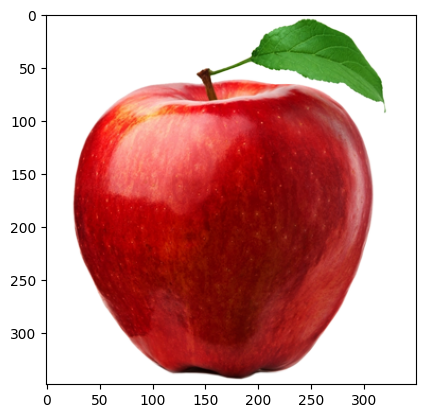

In [9]:
img = Image.open('C:/Users/65972/Desktop/For Internship/ML Project/train/0/apple_1.jpg')
img_data = np.array(img)
print(img_data)
print(img_data.shape)
plt.imshow(img_data)
#plt.show()

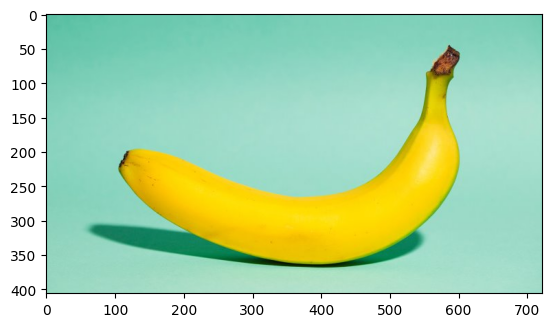

In [6]:
#Show an sample digit.

def show_sample_digit():
    img = Image.open('C:/Users/65972/Desktop/For Internship/ML Project/train/2/banana_1.jpg')
    #plt.imshow(img)
    plt.show()
show_sample_digit()

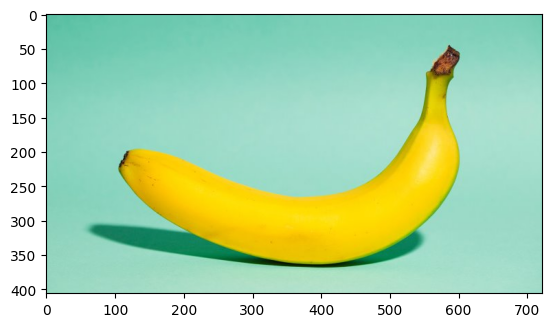

In [7]:
show_sample_digit()

In [9]:

def create_model():
    #construct neural network architectures in Keras
    #a linear stack of layers in the neural network model. 
    #It allows you to easily construct a model layer by layer.
    model = Sequential()
    # adding a 2D convolutional layer, this is  foundational to CNNs and are especially powerful for tasks like image recognition
    #128: The first argument, 128, is the number of filters (or kernels) that the convolutional layer will learn. 
    # These filters are responsible for sliding over the input data (such as an image) to produce feature maps, highlighting certain aspects of the data.
    model.add(Conv2D(128,3, activation='relu', input_shape=(100, 100, 3)))
    model.add(MaxPooling2D())
    model.add(Conv2D(64,3, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(32,3, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()



In [11]:
train_path= 'c:/Users/65972/Desktop/For Internship/ML Project/train'
test_path = 'c:/Users/65972/Desktop/For Internship/ML Project/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)
test_datagen = ImageDataGenerator(rescale= 1./255)
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size = (100,100),
                                                    batch_size = 32,
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size = (100,100),
                                                    batch_size = 32,
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical')

Found 293 images belonging to 4 classes.
Found 60 images belonging to 4 classes.


In [12]:
# Apply learning rate reduction
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1, factor=0.5, min_lr=0.00001)

# Fit the model with training data
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size,
    callbacks=[learning_rate_reduction]
)

# Train the model
# history = model.fit(train_generator,epochs=15 ,validation_data=(test_generator))                   

Epoch 1/20


c:\Users\65972\miniforge3\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


9/9 [==============================] - 8s 819ms/step - loss: 1.4026 - accuracy: 0.2720 - val_loss: 1.3470 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 2/20
9/9 [==============================] - 6s 607ms/step - loss: 1.2944 - accuracy: 0.4828 - val_loss: 0.9680 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 3/20
9/9 [==============================] - 6s 662ms/step - loss: 0.9510 - accuracy: 0.5868 - val_loss: 0.7980 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 4/20
9/9 [==============================] - 6s 610ms/step - loss: 0.8400 - accuracy: 0.6705 - val_loss: 0.9104 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 5/20
9/9 [==============================] - 6s 605ms/step - loss: 0.7001 - accuracy: 0.7241 - val_loss: 0.4640 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 6/20
9/9 [==============================] - 6s 643ms/step - loss: 0.6499 - accuracy: 0.7586 - val_loss: 0.7062 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 7/20
9/9 [==============================] - 6s 632ms/step - loss: 0.4891 - accuracy: 0.

In [13]:
# Evaluate the model on the test set

test_accuracy = model.evaluate(test_generator)



2/2 [==============================] - 0s 185ms/step - loss: 0.5284 - accuracy: 0.8500


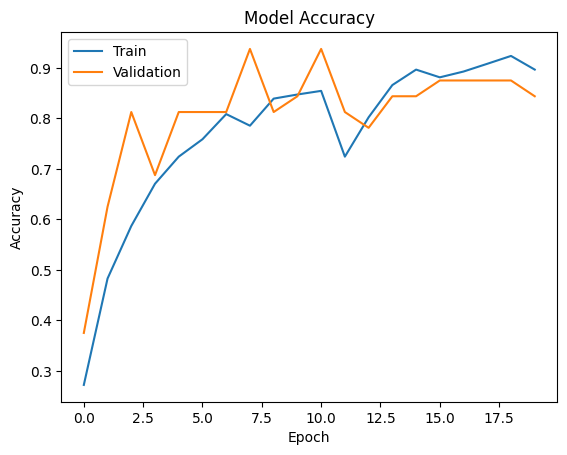

In [15]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

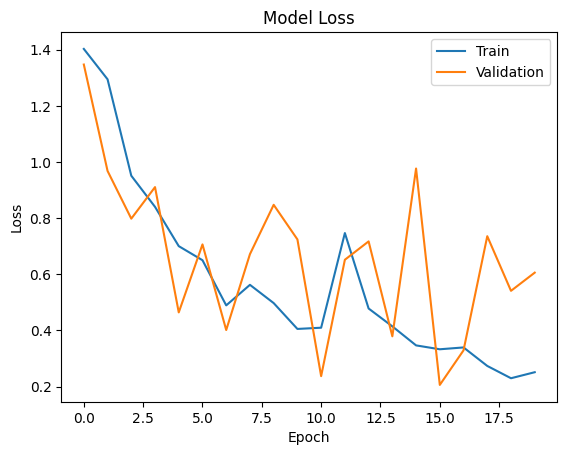

In [17]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()